# Project: Investigate a Dataset - NoShowAppointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset used for this project is about 100,000 entries of medical appointments in Brasil. There are 14 variables in the dataset. The aim of the project is to determine the relationship between the patients appointment status and other variables(characteristics) of patients. The columns in the dataset were: 

- **PatientId**: The identification of the patient

- **AppointmentID**: To identify each appointment

- **Gender**: The patient gender

- **ScheduledDay**: The day someone scheduled the medical appointment 

- **AppointmentDay**: The day of actual appointment

- **Age**: The patient's age

- **Neighbourhood**: Where the appointment takes place

- **Scholarship**: Patient on brasil welfare program (Bolsa Familia)

- **Hipertension**: True or False entry to determine if patients have Hipertension

- **Diabetes**: True or False entry to determine if patients have Diabetes

- **Alcoholism**: True or False entry to determine if patients have alcoholism problems.

- **Handicap**: Entry to determine if patients are handicapped

- **SMS_received**: True or False entry to determine if patients received messages

- **No-show**: True or False entry to determine if patients showed for the appointment


### Question(s) for Analysis
> Do more females show up than males? Does the age group of a patient determine whether they will show up or not? Do patients enrolled in Brasilian welfare program(Bolsa Familia) attend appointments more? Do patients with health challenges or deformity skip appointments more? Do patients who received sms attend appointments more? 
 

In [1]:
# importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# load the data
df = pd.read_csv("./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")

In [4]:
# previewing the first 5 rows in the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# previewing the last 5 rows in your data
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
# Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
# Summary statistis on the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Checking for ages less than or equal to zero
age_zero_below = df.query("Age <= 0")
age_zero_below

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


In [10]:
# Further observation on patients less than or equal to zero
# To determine if they are most likely children based on health issues prone to adults and alcoholism
print(age_zero_below["Hipertension"].unique())
print(age_zero_below["Diabetes"].unique())
print(age_zero_below["Alcoholism"].unique())

[0]
[0]
[0]


In [11]:
# Checking for patient age data below 0
df.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# checking the handcap column to see if the entries are zeros and ones as stated from the data source
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### Observations
After checking through the data, I observed the following:


- Errors in the data entry for appointment day because the first few rows show that the scheduled day 
was later than the day of appointment. The 
datatype for both scheduled day and appointment day were both **object** instead of **datetime**.

- There are no missing values in the dataset

- There are no duplicated rows

- At least 75% of the patients were not alcolic and did not suffer from any of the medical conditions listed.

- At least 50 % of the patients did not receive sms

- At least 75 % of the patients were on Bolsa Familia welfare program

- There was one entry of age less than 0 which is most likely an error

- The handicap had five cateories instead of the expected two (0 and 1)


### Data Cleaning

In [13]:
# Dropping appointment day column
df.drop("AppointmentDay", axis = 1, inplace = True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,19,CONQUISTA,0,0,0,0,0,0,No


In [14]:
# dropping the row with age less than 0 because a newborn's age can be 0 but not less
df.drop(99832, inplace = True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,19,CONQUISTA,0,0,0,0,0,0,No


In [15]:
# changing the values for handicap that are more than 1 to 1
# creating the function to perform the change
def onezero(val):
    if val > 1:
        val = 1
    return val
df["Handcap"] = df["Handcap"].map(onezero)

In [16]:
# checking the handcap unique value after changing values greater than 1 to 1
df["Handcap"].unique()

array([0, 1])

In [17]:
# dropping other columns not needed for answering the questions posed for this analysis
df.drop(["PatientId", "AppointmentID", "Neighbourhood", "ScheduledDay"], axis = 1, inplace = True)

The data is cleaned and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do more females show up than males?)

In [18]:
# creating function that groups data based on category
def groups(df, cols):
    if len(cols) == 1:
        return df.groupby(cols[0])
    else:
        return df.groupby(cols)

In [19]:
# creating gender counts for no-show
gender_counts = groups(df, ["Gender", 'No-show']).count()["Age"]
gender_counts

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: Age, dtype: int64

In [20]:
# creating gender total
gender_total = groups(df, ["Gender"]).count()["Age"]
gender_total

Gender
F    71839
M    38687
Name: Age, dtype: int64

In [21]:
# creatingg female proportions
female_prop = gender_counts["F"] / gender_total["F"]
female_prop

No-show
No     0.796851
Yes    0.203149
Name: Age, dtype: float64

In [22]:
# creating male proportions
male_prop = gender_counts["M"] / gender_total["M"]
male_prop

No-show
No     0.800321
Yes    0.199679
Name: Age, dtype: float64

In [23]:
def barchart(a, b,  f = ["no-show", "gender proportions"], 
             g = ["female", "male"], lab = ["No", "Yes"] ):
    """
    The aim of this function is create barplots from two Series.
    The function has three default parameters which are f, g, lab.
    Where f represents the labels for the x-axis and y-axis on the chart,
    g represents the labels for bars belonging to females and males
    lab represents the labels of the x-ticks.
    Each of the default parameters can be changed if needed by the user
    """
    x_ind = np.arange(len(a))
    color_n = np.array(["b", "w", "grey", "chocolate"])
    np.random.shuffle(color_n)
    a_bars = plt.bar(x_ind, a, 0.4, color = color_n[0], alpha = 0.8, label = g[0])
    b_bars = plt.bar(x_ind + 0.4, b, 0.4, color = color_n[1], alpha = 0.6, label = g[1])
    plt.xlabel(f[0])
    plt.ylabel(f[1])
    plt.title(f[1] + " " + "by" + " " + f[0])
    loc = x_ind + 0.2
    plt.xticks(loc, lab)
    plt.legend()
    

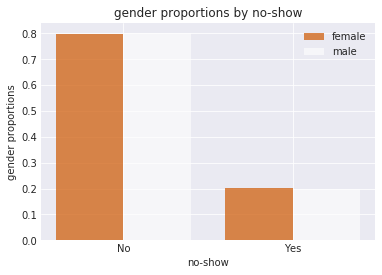

In [24]:
# A barplot showing gender proportion by no-show of appointment
barchart(female_prop, male_prop)

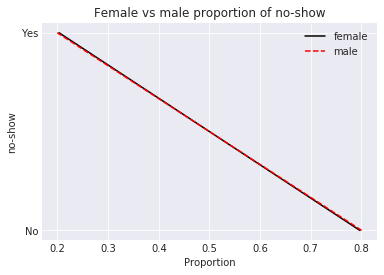

In [25]:
# A line plot showing gender proportion for no-show
plt.plot(female_prop, ["No", "Yes"], "black", label = "female")
plt.plot(male_prop, ["No", "Yes"],  "r--", label = "male")
plt.title("Female vs male proportion of no-show")
plt.xlabel("Proportion")
plt.ylabel("no-show")
plt.legend();

The line plot shows the Males showing up for the appointment is slightly higher than females unlike the barplot
which does not really show it

From the data description it was noted that females were more corcerned about their health than
males, therefore females booked appointments more. Although more females book the proportion of
attendance were slightly higher for males

### Research Question 2  (Does the age group of a patient determine whether they will show up or not?)

In [26]:
# Creating two age categories
# Using 65 as threshold because people are more prone to health challenges from 65 and above
# To determine if older people prone to sickness attend appointments more 
bins = [0, 64, 115]
tags = ["younger than 65", "65 and above"]
df["AgeCategory"] = pd.cut(df["Age"], bins, labels = tags)

In [27]:
# checking the data of patients 65 years and above
sixty_five = df.query("Age >= 65")
sixty_five

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeCategory
5,F,76,0,1,0,0,0,0,No,65 and above
24,F,65,0,0,0,0,0,0,No,65 and above
34,F,79,0,1,0,0,0,0,No,65 and above
38,M,85,0,1,0,0,0,1,No,65 and above
41,F,71,0,0,1,0,0,0,No,65 and above
44,F,78,0,1,1,0,0,0,Yes,65 and above
68,F,69,0,1,0,0,0,1,No,65 and above
73,F,68,0,1,1,0,0,1,No,65 and above
79,M,67,0,0,0,0,0,1,Yes,65 and above
80,M,68,0,0,0,0,0,1,No,65 and above


In [28]:
# checking to see if patients that were 65 and above had more hypersion 
sixty_five["Hipertension"].value_counts()

1    8537
0    5865
Name: Hipertension, dtype: int64

In [29]:
# checking to see if patients that were 65 and above had more Diabetes 
sixty_five["Diabetes"].value_counts()

0    11039
1     3363
Name: Diabetes, dtype: int64

In [30]:
# Creating a function that returns the proportions of two categories in a Column or Feature
def proportion(col_name, cat1, cat2):
    """
    This function takes in three parameter.
    col_name: The column of interest
    cat1: A category or group in the column
    cat2: A category or group in the column
    """
    count = groups(df, [col_name, 'No-show']).count()["Gender"]
    total = groups(df, [col_name]).count()["Gender"]
    proportion1 = count[cat1] / total[cat1]
    proportion2 = count[cat2] / total[cat2]
    return proportion1, proportion2

In [31]:
# creating below65 age category proportions
below_65 = proportion("AgeCategory", "younger than 65", "65 and above")[0]
below_65

No-show
No     0.789955
Yes    0.210045
Name: Gender, dtype: float64

In [32]:
# creating 65 and above age category proportions
above_65 = proportion("AgeCategory", "younger than 65", "65 and above")[1]
above_65

No-show
No     0.844952
Yes    0.155048
Name: Gender, dtype: float64

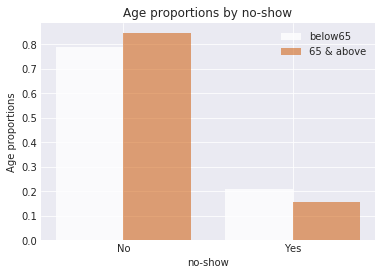

In [33]:
# A barplot showing age proportion by no-show of appointment
barchart(below_65, above_65, f = ["no-show", "Age proportions"], g = ["below65", "65 & above"])

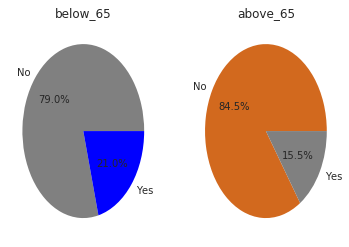

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(below_65, labels = ["No", "Yes"], colors = ["gray", "b"], autopct = "%1.1f%%")
ax2.pie(above_65, labels = ["No", "Yes"], colors = ["chocolate", "gray"], autopct = "%1.1f%%")
ax1.set_title("below_65")
ax2.set_title("above_65");

The proportion of patients 65 years and above had a higher appointment attendance rate

### Research Question 3  (Do patients enrolled in Brasilian welfare program(Bolsa Familia) attend appointments more?)

In [35]:
# checking the categories in the Scholarship column
df["Scholarship"].unique()

array([0, 1])

In [36]:
# creating no-scholarship category proportions
no_scholar = proportion("Scholarship", 0, 1)[0]
no_scholar 

No-show
No     0.801926
Yes    0.198074
Name: Gender, dtype: float64

In [37]:
# creating yes-scholarship category proportions
scholar = proportion("Scholarship", 0, 1)[1]
scholar 

No-show
No     0.762637
Yes    0.237363
Name: Gender, dtype: float64

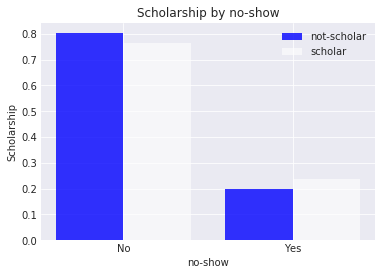

In [38]:
# A barplot showing scholarship proportion by no-show of appointment
barchart(no_scholar, scholar, f = ["no-show", "Scholarship"], g = ["not-scholar", "scholar"])

The proportion of patients not on scholarship had a higher appointment attendance rate

### Research Question 4 (Do patients with health challenges, alcoholic problems or deformity skip appointments more?)

In [39]:
# To answer the question above, I will use Hipertension, Diabetes, Alcoholism, Handcap columns
# which all have unique values of 0 and 1 to indicate False and True

**Hypertension**

In [40]:
# creating no-Hipertension category proportions
no_hyp = proportion("Hipertension", 0, 1)[0]
no_hyp 

No-show
No     0.790961
Yes    0.209039
Name: Gender, dtype: float64

In [41]:
# creating yes-Hipertension category proportions
hyp = proportion("Hipertension", 0, 1)[1]
hyp 

No-show
No     0.82698
Yes    0.17302
Name: Gender, dtype: float64

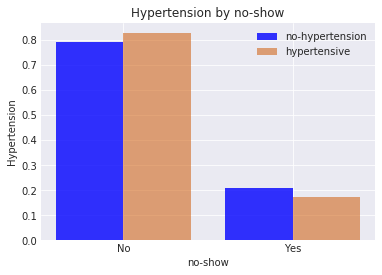

In [42]:
# A barplot showing hypertension proportion by no-show of appointment
barchart(no_hyp, hyp, f = ["no-show", "Hypertension"], g = ["no-hypertension", "hypertensive"])

**Diabetes**

In [43]:
# creating no-Diabetes category proportions
no_dbt = proportion("Diabetes", 0, 1)[0]
no_dbt 

No-show
No     0.79637
Yes    0.20363
Name: Gender, dtype: float64

In [44]:
# creating yes-Diabetes category proportions
dbt = proportion("Diabetes", 0, 1)[1]
dbt 

No-show
No     0.819967
Yes    0.180033
Name: Gender, dtype: float64

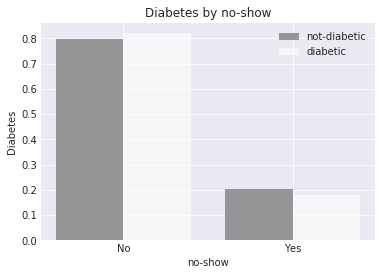

In [45]:
# A barplot showing hypertension proportion by no-show of appointment
barchart(no_dbt, dbt, f = ["no-show", "Diabetes"], g = ["not-diabetic", "diabetic"])

**Handicap**

In [46]:
# creating no-Handcap category proportions
no_hdcp = proportion("Handcap", 0, 1)[0]
no_hdcp 

No-show
No     0.797645
Yes    0.202355
Name: Gender, dtype: float64

In [47]:
# creating yes-Handcap category proportions
hdcp = proportion("Handcap", 0, 1)[1]
hdcp 

No-show
No     0.818385
Yes    0.181615
Name: Gender, dtype: float64

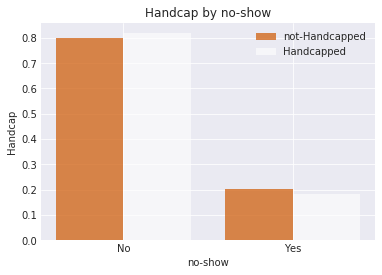

In [48]:
# A barplot showing Handcap proportion by no-show of appointment
barchart(no_hdcp, hdcp, f = ["no-show", "Handcap"], g = ["not-Handcapped", "Handcapped"])

**Alcoholism**

In [49]:
# creating no-Alcoholism category proportions
no_alc = proportion("Alcoholism", 0, 1)[0]
no_alc 

No-show
No     0.798052
Yes    0.201948
Name: Gender, dtype: float64

In [50]:
# creating yes-Alcoholism category proportions
alc = proportion("Alcoholism", 0, 1)[1]
alc 

No-show
No     0.798512
Yes    0.201488
Name: Gender, dtype: float64

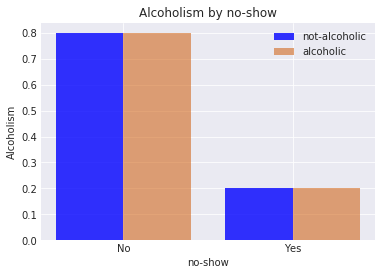

In [51]:
# A barplot showing Alcoholism proportion by no-show of appointment
barchart(no_alc, alc, f = ["no-show", "Alcoholism"], g = ["not-alcoholic", "alcoholic"])

The analysis on how medical conditions or alcoholism affect patients showing up for appointments show
that the proportion of patients with medical condition attendance were slightly higher than those
without. Also the difference bewteen the proportion of non-alcoholics and alcoholics attendance was 
very minute(almost un-noticeable)

### Research Question 5 (Do patients who received sms attend appointments more?) 

In [52]:
# creating no-sms category proportions
no_sms = proportion("SMS_received", 0, 1)[0]
no_sms 

No-show
No     0.832965
Yes    0.167035
Name: Gender, dtype: float64

In [53]:
# creating yes-sms category proportions
sms = proportion("SMS_received", 0, 1)[1]
sms 

No-show
No     0.724255
Yes    0.275745
Name: Gender, dtype: float64

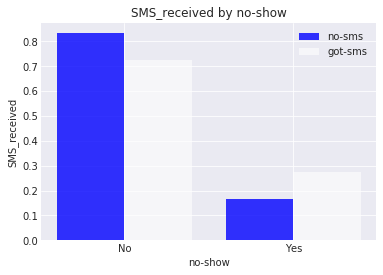

In [54]:
# A barplot showing SMS_received proportion by no-show of appointment
barchart(no_sms, sms, f = ["no-show", "SMS_received"], g = ["no-sms", "got-sms"])

The proportion of patients who received sms attendance was lower than those who did not receive smsm

#### Proportion of appointment attendance

In [55]:
# percentage proportion
df["No-show"].value_counts(normalize = True) * 100

No     79.806561
Yes    20.193439
Name: No-show, dtype: float64

<a id='conclusions'></a>
## Conclusions

> The analysis conducted shows that at least 79% of Patients attended their appointment. It showed
that the proportion of males attendance rate were higher than females, the proportion of patients 
65 years and above attendance were more than those below 65 years, the proportion of patients that 
had medical conditions had a higher attendance rate than those that did not, the proportion of 
patients that had welfare scholarship had a lower attendance rate than those that did not, the 
proportion of patients that received sms had a lower attendance rate than those that did not.

> Automatic email reminders can be created for patients. Automatic calls reminder can be put in place
for patients that are either younger than 65 or are on welfare scholarship and can be extended to 
every patient if affordable

> **Limitations:**
Some features that would have been useful in asking more question to reveal findings had data quality issues or too many unique
values. Such as the appointment column and neighbourhood column. 
The appointment column could have been used to check how many days or weeks the appointment was going to hold from the scheduled day. Analysis could have been done to determine if the days or weeks had impact on a patients attendance rate for appointments. The neighbourhood column had too many unique values, therefore I could not question how location affects the appointment attendance because of the timeframe I had was short so I could not make sufficient research, such as were all the neighbourhood listed in the same city or different cities. 

### References
(https://pandas.pydata.org/docs)[https://pandas.pydata.org/docs]

(https://www.markdownguide.org/basic-syntax/)[https://www.markdownguide.org/basic-syntax/]

(https://matplotlib.org)[https://matplotlib.org/]

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0